# 유럽 축구선수 분석

### Manchester United에는 어떤 선수를 영입해야할까?



# Introduction

2013년 5월 8일 Manchester United의 감독이자 유럽 축구의 한 획을 그은 Alex Ferguson감독이 은퇴를 하였다. Manchester United는 Alex Ferguson감독이 은퇴를 하고 당시 타팀에서 감독을 하던 데이비드 모이스감독을 선임 하였지만 거짓말처럼 하락세를 타며 팀의 명성에 걸맞지 않은 순위로 시즌을 끝냈다. 그 후 데이비드 모이스감독이 나간 후 루이 반 할, 조세 무리뉴등 세계적인 감독이 Manchester United의 지휘봉을 맡았으나 Manchester United는 Alex Ferguson감독이 지휘했던 시절의 위상을 되찾지 못했다. 이러한 사건들을 겪은 Manchester United는 Alex Ferguson감독이 지휘를 했던 당시 선수였던 올레 군나르 솔샤르 감독을 부임시키는 특단의 조취를 내놓았고, 2020년 3월 기준 올레 군나르 솔샤르감독은 2019/2020시즌 겨울시장에서 단 두명의 선수를 영입하며 Manchester United의 분위기를 반전시키는데 성공한다.

그렇다면, Manchester United의 분위기를 반전시킨 단 두명의 선수는 어떤 선수일까, 그 두명의 선수가 있었기에 Manchester United가 반전에 성공한 것일까? 

문제가 해결되기 전인 2018/2019 FIFA데이터를 통해 Manchester United팀을 분석하고 해외 유럽 축구선수 중에 Manchester United에 필요한 유형인 선수를 발굴하고 현재 올레 군나르 솔샤르 감독이 영입한 선수와 비교해보자.

---------------------------------------------------------------------------------------------------------------------------------

# 1. 데이터 수집

## a. 데이터 불러오기

In [3]:
import pandas as pd

In [4]:
# Fifa data 불러오기
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/FIFA_data.csv')

In [5]:
# 데이터 확인
data.head()


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94.0,94.0,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94.0,94.0,Juventus,€77M,€405K,Right,5.0,4.0,5.0,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92.0,93.0,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91.0,93.0,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91.0,92.0,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## b. 데이터 확인 후, 분석 계획 설립

---



| 컬럼 명 |  컬럼 의미 |
|--------|-----------|
| ID | 고유의 번호 |
| Name | 이름 |
| Age | 나이 |
| Overall | 현재 능력치 |
| Potential | 잠재 능력치 |
| Club | 소속 팀 |
| Value | 예상 이적료 (유로) |
| Wage | 주급 (유로)|
| Preferred Foot | 잘 사용하는 발 |
| Weak Foot | 잘 사용하지 않는 발 |
| Skill Moves | 개인기 |
| Position | 포지션 |
| Jersey Number | 등번호 |
| Joined | 소속 팀 입단 날짜 |
| Contract Valid Until | 계약 기간 |
| Height | 키 (피트) |
| Weight | 몸무게 (파운드) |
| LS ~ RB | 포지션 별 능력치 |
| Crossing ~ GKReflexes | 세부 능력치 |
| Release Clause | 바이아웃 |


#### 분석 순서
- 1. Manchester United의 선수들을 분석
- 2. Manchester United의 지역 라이벌  Manchester City선수와 능력치 비교
- 3. 부족한 포지션 2개 선택
- 4. 다른팀의 선수 중  Manchester United의 재정, 현실가능성, 영입방침을 고려하여 2명의 선수를 영입

--------------------------------------------------------------------------------------------------------------------------
# 2. Manchester United 분석 - Manchester United는 어떤 선수들이 존재하는가?
## a. EDA

In [6]:
# 맨유 선수들만 추출
mu = data[data['Club'] == 'Manchester United']

In [7]:
# 맨유데이터 확인
mu.head()


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91.0,93.0,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
45,195864,P. Pogba,25,France,87.0,91.0,Manchester United,€64M,€210K,Right,4.0,4.0,5.0,RDM,6.0,"Aug 9, 2016",2021,6'4,185lbs,81+3,81+3,81+3,82+3,82+3,82+3,82+3,82+3,83+3,83+3,83+3,83+3,84+3,84+3,84+3,83+3,77+3,78+3,78+3,78+3,77+3,75+3,74+3,74+3,74+3,75+3,80.0,73.0,73.0,86.0,85.0,87.0,84.0,82.0,90.0,90.0,71.0,79.0,74.0,81.0,64.0,90.0,83.0,88.0,89.0,81.0,78.0,66.0,81.0,87.0,81.0,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,€123.2M
47,192505,R. Lukaku,25,Belgium,87.0,89.0,Manchester United,€62.5M,€230K,Left,3.0,3.0,3.0,ST,9.0,"Jul 10, 2017",2022,6'3,207lbs,84+3,84+3,84+3,79+3,81+3,81+3,81+3,79+3,78+3,78+3,78+3,79+3,72+3,72+3,72+3,79+3,60+3,58+3,58+3,58+3,60+3,57+3,54+3,54+3,54+3,57+3,78.0,87.0,86.0,77.0,79.0,80.0,74.0,66.0,73.0,72.0,77.0,90.0,60.0,86.0,46.0,88.0,71.0,84.0,94.0,74.0,75.0,27.0,89.0,76.0,78.0,83.0,30.0,30.0,30.0,8.0,15.0,14.0,7.0,10.0,€120.3M
93,184941,A. Sánchez,29,Chile,85.0,85.0,Manchester United,€37.5M,€215K,Right,4.0,3.0,4.0,RW,7.0,"Jan 22, 2018",2022,5'7,163lbs,81+3,81+3,81+3,82+3,82+3,82+3,82+3,82+3,82+3,82+3,82+3,82+3,77+3,77+3,77+3,82+3,65+3,64+3,64+3,64+3,65+3,62+3,57+3,57+3,57+3,62+3,77.0,80.0,73.0,77.0,83.0,87.0,79.0,78.0,75.0,86.0,86.0,79.0,90.0,83.0,87.0,84.0,87.0,83.0,72.0,81.0,79.0,46.0,84.0,82.0,77.0,84.0,38.0,44.0,35.0,10.0,10.0,15.0,12.0,13.0,€69.4M
116,211300,A. Martial,22,France,84.0,90.0,Manchester United,€42.5M,€165K,Right,3.0,3.0,4.0,LW,11.0,"Sep 1, 2015",2019,6'0,168lbs,81+3,81+3,81+3,82+3,82+3,82+3,82+3,82+3,80+3,80+3,80+3,81+3,73+3,73+3,73+3,81+3,64+3,60+3,60+3,60+3,64+3,61+3,54+3,54+3,54+3,61+3,76.0,84.0,69.0,77.0,74.0,87.0,84.0,54.0,60.0,86.0,88.0,89.0,85.0,81.0,81.0,84.0,74.0,75.0,75.0,80.0,58.0,42.0,83.0,73.0,81.0,79.0,38.0,39.0,36.0,9.0,8.0,8.0,15.0,11.0,€87.1M


In [8]:
# Club이 맨유인 선수들만 추출 된것 확인
mu['Club'].unique()

array(['Manchester United'], dtype=object)

In [9]:
# 맨유선수의 나이, 포지션, 능력치, 잠재 능력치 확인
print(f"맨유선수들의 평균 나이 : {mu['Age'].mean()}\n")
print(f"맨유선수들의 포지션 : {mu['Position'].unique()}\n")
print(f"맨유선수들의 평균 능력치 : {mu['Overall'].mean()}\n")
print(f"맨유선수들의 평균 잠재능력치 : {mu['Potential'].mean()}\n")

맨유선수들의 평균 나이 : 24.757575757575758

맨유선수들의 포지션 : ['GK' 'RDM' 'ST' 'RW' 'LW' 'CDM' 'RM' 'CM' 'CAM' 'CB' 'RCB' 'LB' 'RB']

맨유선수들의 평균 능력치 : 80.18181818181819

맨유선수들의 평균 잠재능력치 : 82.81818181818181



In [10]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


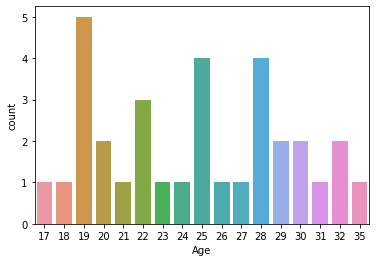

In [11]:
# 나이별 선수 수
sns.countplot(mu['Age'])

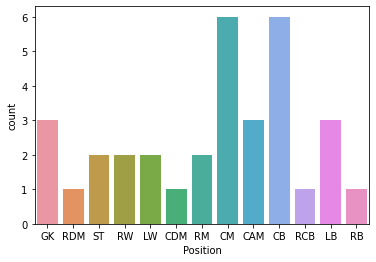

In [12]:
# 포지션 별 선수 수
sns.countplot(mu['Position'])

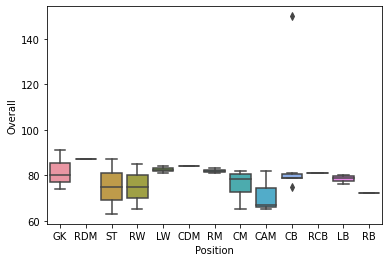

In [13]:
# 포지션별 현재 능력치에 대한 Box Plot
sns.boxplot(x = mu['Position'], y = mu['Overall'])

### CB에 두개의 이상치가 있는 것으로 확인되나 140이상의 이상치만 이상치일 것으로 예상

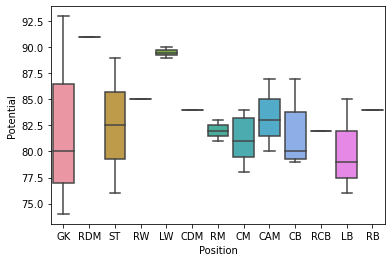

In [14]:
# 포지션별 잠재 능력치에 대한 Box Plot
sns.boxplot(x = mu['Position'], y = mu['Potential'])

### 이상치 처리


In [15]:
# 이상치 확인
mu[(mu['Position'] == 'CB') & (mu['Overall'] > 100)]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
11422,237160,R. Williams,19,England,150.0,79.0,Manchester United,€875K,€8K,Right,1.0,3.0,2.0,CB,52.0,"Jan 1, 2016",2019,6'0,165lbs,46+2,46+2,46+2,47+2,46+2,46+2,46+2,47+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2,55+2,57+2,57+2,57+2,55+2,57+2,62+2,62+2,62+2,57+2,32.0,27.0,63.0,58.0,37.0,51.0,35.0,36.0,55.0,50.0,72.0,74.0,58.0,52.0,59.0,43.0,65.0,41.0,68.0,30.0,66.0,56.0,29.0,43.0,49.0,51.0,63.0,68.0,66.0,7.0,5.0,6.0,6.0,9.0,€2.2M


In [16]:
# 같은 포지션 선수의 Overall 과 CB점수의 비교
mu[mu['Position'] == 'CB'][['Name','Overall', 'Position', 'CB']]

,Name,Overall,Position,CB
327,E. Bailly,81.0,CB,80+2
584,V. Lindelöf,79.0,CB,77+2
629,M. Rojo,79.0,CB,78+3
654,P. Jones,79.0,CB,78+2
11081,R. Poole,75.0,CB,62+2
11422,R. Williams,150.0,CB,62+2


In [17]:
# CB점수가 같으면 Overall 점수가 비슷함으로 동일한 CB점수를 가진 선수와 같은 Overall로 대체

mu['Overall'][11422] = 75

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


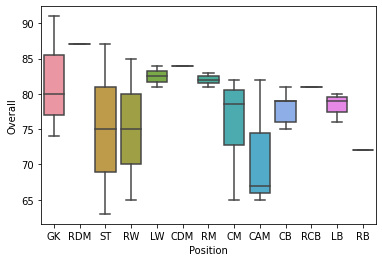

In [18]:
sns.boxplot(x=mu['Position'], y = mu['Overall'])


### 결측치 찾기


In [19]:
mu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 3 to 12545
Data columns (total 80 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        33 non-null     int64  
 1   Name                      33 non-null     object 
 2   Age                       33 non-null     int64  
 3   Nationality               33 non-null     object 
 4   Overall                   33 non-null     float64
 5   Potential                 33 non-null     float64
 6   Club                      33 non-null     object 
 7   Value                     33 non-null     object 
 8   Wage                      33 non-null     object 
 9   Preferred Foot            33 non-null     object 
 10  International Reputation  33 non-null     float64
 11  Weak Foot                 33 non-null     float64
 12  Skill Moves               33 non-null     float64
 13  Position                  33 non-null     object 
 14  Jersey Nu

In [20]:
# LS ~ RB 까지 결측치 3개 확인

mu[mu.isna()['LS']]


# GK  선수는 필드플레이어의 능력치가 결측치 처리 된 것을 확인

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91.0,93.0,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
526,173373,S. Romero,31,Argentina,80.0,80.0,Manchester United,€9M,€91K,Right,3.0,3.0,1.0,GK,1.0,"Jul 27, 2015",2021,6'4,192lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,14.0,12.0,39.0,17.0,12.0,12.0,13.0,48.0,40.0,47.0,44.0,52.0,78.0,44.0,14.0,63.0,35.0,75.0,11.0,33.0,21.0,11.0,55.0,16.0,62.0,14.0,11.0,15.0,78.0,76.0,81.0,77.0,82.0,€16.7M
2561,53739,L. Grant,35,England,74.0,74.0,Manchester United,€1.3M,€39K,Right,1.0,4.0,1.0,GK,13.0,"Jul 3, 2018",2020,6'4,183lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,17.0,14.0,43.0,15.0,11.0,17.0,19.0,40.0,34.0,52.0,46.0,56.0,69.0,56.0,24.0,73.0,39.0,71.0,19.0,42.0,26.0,14.0,50.0,20.0,60.0,12.0,13.0,19.0,74.0,72.0,74.0,74.0,76.0,€2.5M


In [21]:
# NaN값을 측정할 수 없다는 의미의 -1로 교체
mu = mu.fillna(-1)


In [22]:
# 결칙치가 잘 대체되었는지 확인

mu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 3 to 12545
Data columns (total 80 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        33 non-null     int64  
 1   Name                      33 non-null     object 
 2   Age                       33 non-null     int64  
 3   Nationality               33 non-null     object 
 4   Overall                   33 non-null     float64
 5   Potential                 33 non-null     float64
 6   Club                      33 non-null     object 
 7   Value                     33 non-null     object 
 8   Wage                      33 non-null     object 
 9   Preferred Foot            33 non-null     object 
 10  International Reputation  33 non-null     float64
 11  Weak Foot                 33 non-null     float64
 12  Skill Moves               33 non-null     float64
 13  Position                  33 non-null     object 
 14  Jersey Nu

# 3. Manchester United는 어떤 포지션을 보강해야 할까?

## a. 전처리


### 맨유의 라이벌 맨시티와의 비교를 위한 전처리 진행


In [23]:
# Manchester City선수와 능력치 비교를 하기 위해 MU, MC선수가 담긴 데이터를 만듭니다.
df = data[(data['Club'] == 'Manchester United') | (data['Club'] == 'Manchester City')]

In [24]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91.0,93.0,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91.0,92.0,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
13,168542,David Silva,32,Spain,90.0,90.0,Manchester City,€60M,€285K,Left,4.0,2.0,4.0,LCM,21.0,"Jul 14, 2010",2020,5'8,148lbs,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,85+3,85+3,85+3,85+3,85+3,69+3,70+3,70+3,70+3,69+3,64+3,57+3,57+3,57+3,64+3,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,70.0,64.0,92.0,90.0,90.0,72.0,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,€111M
23,153079,S. Agüero,30,Argentina,89.0,89.0,Manchester City,€64.5M,€300K,Right,4.0,4.0,4.0,ST,10.0,"Jul 28, 2011",2021,5'8,154lbs,86+3,86+3,86+3,86+3,87+3,87+3,87+3,86+3,85+3,85+3,85+3,83+3,76+3,76+3,76+3,83+3,58+3,56+3,56+3,56+3,58+3,53+3,47+3,47+3,47+3,53+3,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,64.0,89.0,88.0,80.0,86.0,90.0,91.0,88.0,81.0,76.0,73.0,83.0,65.0,24.0,92.0,83.0,83.0,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,€119.3M
45,195864,P. Pogba,25,France,87.0,91.0,Manchester United,€64M,€210K,Right,4.0,4.0,5.0,RDM,6.0,"Aug 9, 2016",2021,6'4,185lbs,81+3,81+3,81+3,82+3,82+3,82+3,82+3,82+3,83+3,83+3,83+3,83+3,84+3,84+3,84+3,83+3,77+3,78+3,78+3,78+3,77+3,75+3,74+3,74+3,74+3,75+3,80.0,73.0,73.0,86.0,85.0,87.0,84.0,82.0,90.0,90.0,71.0,79.0,74.0,81.0,64.0,90.0,83.0,88.0,89.0,81.0,78.0,66.0,81.0,87.0,81.0,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,€123.2M


In [25]:
df = df.reset_index().drop(columns = 'index')

In [26]:
# 맨유와 맨시티선수들이 저장되었는 지 확인
df['Club'].unique()

array(['Manchester United', 'Manchester City'], dtype=object)

In [27]:
df.info()
# Value와 Wage가 object type인것을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 80 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        66 non-null     int64  
 1   Name                      66 non-null     object 
 2   Age                       66 non-null     int64  
 3   Nationality               66 non-null     object 
 4   Overall                   66 non-null     float64
 5   Potential                 66 non-null     float64
 6   Club                      66 non-null     object 
 7   Value                     66 non-null     object 
 8   Wage                      66 non-null     object 
 9   Preferred Foot            66 non-null     object 
 10  International Reputation  66 non-null     float64
 11  Weak Foot                 66 non-null     float64
 12  Skill Moves               66 non-null     float64
 13  Position                  66 non-null     object 
 14  Jersey Numbe

### 1M = 1,000,000
### 1K = 1,000

In [28]:
import warnings 
warnings.filterwarnings('ignore')

In [29]:
df['Value'] = df['Value'].str.slice(1,)

df['Value']

0       72M
1      102M
2       60M
3     64.5M
4       64M
      ...  
61     525K
62     450K
63     400K
64     210K
65     120K
Name: Value, Length: 66, dtype: object

In [30]:
s = '.'
for i in range(len(df)):
  if s in df['Value'][i]:
    df['Value'][i] = df['Value'][i].replace('.','')
    df['Value'][i] = df['Value'][i].replace('M','00000')
    df['Value'][i] = df['Value'][i].replace('K','00')
  else:
    df['Value'][i] = df['Value'][i].replace('M','000000')
    df['Value'][i] = df['Value'][i].replace('K','000')   
  

In [31]:
df['Value']

0      72000000
1     102000000
2      60000000
3      64500000
4      64000000
        ...    
61       525000
62       450000
63       400000
64       210000
65       120000
Name: Value, Length: 66, dtype: object

In [32]:
df['Value'] = df['Value'].astype(int)

In [33]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,193080,De Gea,27,Spain,91.0,93.0,Manchester United,72000000,€260K,Right,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
1,192985,K. De Bruyne,27,Belgium,91.0,92.0,Manchester City,102000000,€355K,Right,4.0,5.0,4.0,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
2,168542,David Silva,32,Spain,90.0,90.0,Manchester City,60000000,€285K,Left,4.0,2.0,4.0,LCM,21.0,"Jul 14, 2010",2020,5'8,148lbs,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,85+3,85+3,85+3,85+3,85+3,69+3,70+3,70+3,70+3,69+3,64+3,57+3,57+3,57+3,64+3,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,70.0,64.0,92.0,90.0,90.0,72.0,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,€111M
3,153079,S. Agüero,30,Argentina,89.0,89.0,Manchester City,64500000,€300K,Right,4.0,4.0,4.0,ST,10.0,"Jul 28, 2011",2021,5'8,154lbs,86+3,86+3,86+3,86+3,87+3,87+3,87+3,86+3,85+3,85+3,85+3,83+3,76+3,76+3,76+3,83+3,58+3,56+3,56+3,56+3,58+3,53+3,47+3,47+3,47+3,53+3,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,64.0,89.0,88.0,80.0,86.0,90.0,91.0,88.0,81.0,76.0,73.0,83.0,65.0,24.0,92.0,83.0,83.0,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,€119.3M
4,195864,P. Pogba,25,France,87.0,91.0,Manchester United,64000000,€210K,Right,4.0,4.0,5.0,RDM,6.0,"Aug 9, 2016",2021,6'4,185lbs,81+3,81+3,81+3,82+3,82+3,82+3,82+3,82+3,83+3,83+3,83+3,83+3,84+3,84+3,84+3,83+3,77+3,78+3,78+3,78+3,77+3,75+3,74+3,74+3,74+3,75+3,80.0,73.0,73.0,86.0,85.0,87.0,84.0,82.0,90.0,90.0,71.0,79.0,74.0,81.0,64.0,90.0,83.0,88.0,89.0,81.0,78.0,66.0,81.0,87.0,81.0,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,€123.2M


In [34]:
# MU선수들과 MC선수들을 분리
mu = df[df['Club'] == 'Manchester United']
mc = df[df['Club'] == 'Manchester City']



In [35]:
mu['Club'].unique()

array(['Manchester United'], dtype=object)

In [36]:
mu.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,193080,De Gea,27,Spain,91.0,93.0,Manchester United,72000000,€260K,Right,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,195864,P. Pogba,25,France,87.0,91.0,Manchester United,64000000,€210K,Right,4.0,4.0,5.0,RDM,6.0,"Aug 9, 2016",2021,6'4,185lbs,81+3,81+3,81+3,82+3,82+3,82+3,82+3,82+3,83+3,83+3,83+3,83+3,84+3,84+3,84+3,83+3,77+3,78+3,78+3,78+3,77+3,75+3,74+3,74+3,74+3,75+3,80.0,73.0,73.0,86.0,85.0,87.0,84.0,82.0,90.0,90.0,71.0,79.0,74.0,81.0,64.0,90.0,83.0,88.0,89.0,81.0,78.0,66.0,81.0,87.0,81.0,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,€123.2M
5,192505,R. Lukaku,25,Belgium,87.0,89.0,Manchester United,62500000,€230K,Left,3.0,3.0,3.0,ST,9.0,"Jul 10, 2017",2022,6'3,207lbs,84+3,84+3,84+3,79+3,81+3,81+3,81+3,79+3,78+3,78+3,78+3,79+3,72+3,72+3,72+3,79+3,60+3,58+3,58+3,58+3,60+3,57+3,54+3,54+3,54+3,57+3,78.0,87.0,86.0,77.0,79.0,80.0,74.0,66.0,73.0,72.0,77.0,90.0,60.0,86.0,46.0,88.0,71.0,84.0,94.0,74.0,75.0,27.0,89.0,76.0,78.0,83.0,30.0,30.0,30.0,8.0,15.0,14.0,7.0,10.0,€120.3M
13,184941,A. Sánchez,29,Chile,85.0,85.0,Manchester United,37500000,€215K,Right,4.0,3.0,4.0,RW,7.0,"Jan 22, 2018",2022,5'7,163lbs,81+3,81+3,81+3,82+3,82+3,82+3,82+3,82+3,82+3,82+3,82+3,82+3,77+3,77+3,77+3,82+3,65+3,64+3,64+3,64+3,65+3,62+3,57+3,57+3,57+3,62+3,77.0,80.0,73.0,77.0,83.0,87.0,79.0,78.0,75.0,86.0,86.0,79.0,90.0,83.0,87.0,84.0,87.0,83.0,72.0,81.0,79.0,46.0,84.0,82.0,77.0,84.0,38.0,44.0,35.0,10.0,10.0,15.0,12.0,13.0,€69.4M
16,211300,A. Martial,22,France,84.0,90.0,Manchester United,42500000,€165K,Right,3.0,3.0,4.0,LW,11.0,"Sep 1, 2015",2019,6'0,168lbs,81+3,81+3,81+3,82+3,82+3,82+3,82+3,82+3,80+3,80+3,80+3,81+3,73+3,73+3,73+3,81+3,64+3,60+3,60+3,60+3,64+3,61+3,54+3,54+3,54+3,61+3,76.0,84.0,69.0,77.0,74.0,87.0,84.0,54.0,60.0,86.0,88.0,89.0,85.0,81.0,81.0,84.0,74.0,75.0,75.0,80.0,58.0,42.0,83.0,73.0,81.0,79.0,38.0,39.0,36.0,9.0,8.0,8.0,15.0,11.0,€87.1M


### 주전선수 비교를 위하여 MU주전과 MC주전을 선발

- GK : 1명, CB : 4명 MF : 4명 ST : 2명을 선발
- 선발의 기준은 현재능력치
- GK 리스트 = GK
- CB 리스트 = CB, LCB, RCB, RB, LB
- MF 리스트 = RCM, LCM, RDM, CDM, CM, RM, CAM
- ST 리스트 = ST, LW, RW

In [37]:
# 각 포지션 별 리스트 작성
GK_list = ['GK']
CB_list = ['CB','LCB','RCB','RB','LB']
MF_list = ['RCM','LCM','RDM','CDM','CM','RM','CAM']
ST_list = ['ST','LW', 'RW']


In [38]:
# 주전 선수 선택

gk_count = 1
cb_count = 4
mf_count = 4
st_count = 2

mu_id = []
for index in mu.index:
  if mu['Position'][index] in GK_list:
    if gk_count != 0:
      gk_count -= 1
      mu_id.append(mu['ID'][index])
  elif mu['Position'][index] in CB_list:
    if cb_count != 0:
      mu['Position'][index] = 'CB'
      cb_count -= 1
      mu_id.append(mu['ID'][index])
  elif mu['Position'][index] in MF_list:
    if mf_count != 0:
      mu['Position'][index] = 'MF'
      mf_count -= 1
      mu_id.append(mu['ID'][index])
  else:
    if st_count != 0:
      mu['Position'][index] = 'ST'
      st_count -= 1
      mu_id.append(mu['ID'][index])



In [39]:
mu = mu[mu['ID'].isin(mu_id)]

In [40]:
 # 리스트 안에 있는 선수만 MC선수로 남긴다.
 # 주전 선수 선택

gk_count = 1
cb_count = 4
mf_count = 4
st_count = 2

mc_id = []
for index in mc.index:
  if mc['Position'][index] in GK_list:
    if gk_count != 0:
      gk_count -= 1
      mc_id.append(mc['ID'][index])
  elif mc['Position'][index] in CB_list:
    if cb_count != 0:
      mc['Position'][index] = 'CB'
      cb_count -= 1
      mc_id.append(mc['ID'][index])
  elif mc['Position'][index] in MF_list:
    if mf_count != 0:
      mc['Position'][index] = 'MF'
      mf_count -= 1
      mc_id.append(mc['ID'][index])
  else:
    if st_count != 0:
      mc['Position'][index] = 'ST'
      st_count -= 1
      mc_id.append(mc['ID'][index])



In [41]:
mc =mc[mc['ID'].isin(mc_id)]

In [42]:
 # mu, mc 주전선수가 모인 데이터를 만든다.

 df = pd.concat([mu,mc])

In [43]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,193080,De Gea,27,Spain,91.0,93.0,Manchester United,72000000,€260K,Right,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,195864,P. Pogba,25,France,87.0,91.0,Manchester United,64000000,€210K,Right,4.0,4.0,5.0,MF,6.0,"Aug 9, 2016",2021,6'4,185lbs,81+3,81+3,81+3,82+3,82+3,82+3,82+3,82+3,83+3,83+3,83+3,83+3,84+3,84+3,84+3,83+3,77+3,78+3,78+3,78+3,77+3,75+3,74+3,74+3,74+3,75+3,80.0,73.0,73.0,86.0,85.0,87.0,84.0,82.0,90.0,90.0,71.0,79.0,74.0,81.0,64.0,90.0,83.0,88.0,89.0,81.0,78.0,66.0,81.0,87.0,81.0,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,€123.2M
5,192505,R. Lukaku,25,Belgium,87.0,89.0,Manchester United,62500000,€230K,Left,3.0,3.0,3.0,ST,9.0,"Jul 10, 2017",2022,6'3,207lbs,84+3,84+3,84+3,79+3,81+3,81+3,81+3,79+3,78+3,78+3,78+3,79+3,72+3,72+3,72+3,79+3,60+3,58+3,58+3,58+3,60+3,57+3,54+3,54+3,54+3,57+3,78.0,87.0,86.0,77.0,79.0,80.0,74.0,66.0,73.0,72.0,77.0,90.0,60.0,86.0,46.0,88.0,71.0,84.0,94.0,74.0,75.0,27.0,89.0,76.0,78.0,83.0,30.0,30.0,30.0,8.0,15.0,14.0,7.0,10.0,€120.3M
13,184941,A. Sánchez,29,Chile,85.0,85.0,Manchester United,37500000,€215K,Right,4.0,3.0,4.0,ST,7.0,"Jan 22, 2018",2022,5'7,163lbs,81+3,81+3,81+3,82+3,82+3,82+3,82+3,82+3,82+3,82+3,82+3,82+3,77+3,77+3,77+3,82+3,65+3,64+3,64+3,64+3,65+3,62+3,57+3,57+3,57+3,62+3,77.0,80.0,73.0,77.0,83.0,87.0,79.0,78.0,75.0,86.0,86.0,79.0,90.0,83.0,87.0,84.0,87.0,83.0,72.0,81.0,79.0,46.0,84.0,82.0,77.0,84.0,38.0,44.0,35.0,10.0,10.0,15.0,12.0,13.0,€69.4M
17,191202,N. Matić,29,Serbia,84.0,84.0,Manchester United,24000000,€165K,Left,3.0,3.0,3.0,MF,31.0,"Jul 31, 2017",2020,6'4,187lbs,73+3,73+3,73+3,72+3,74+3,74+3,74+3,72+3,74+3,74+3,74+3,74+3,79+3,79+3,79+3,74+3,78+3,82+3,82+3,82+3,78+3,77+3,80+3,80+3,80+3,77+3,71.0,64.0,74.0,84.0,73.0,80.0,72.0,67.0,83.0,79.0,52.0,59.0,44.0,83.0,50.0,83.0,67.0,84.0,85.0,75.0,80.0,86.0,69.0,73.0,64.0,84.0,83.0,84.0,75.0,7.0,15.0,12.0,14.0,9.0,€44.4M
22,178088,Juan Mata,30,Spain,83.0,83.0,Manchester United,24500000,€160K,Left,3.0,3.0,4.0,MF,8.0,"Jan 25, 2014",2019,5'7,139lbs,74+3,74+3,74+3,80+3,80+3,80+3,80+3,80+3,82+3,82+3,82+3,80+3,77+3,77+3,77+3,80+3,61+3,60+3,60+3,60+3,61+3,56+3,46+3,46+3,46+3,56+3,83.0,78.0,56.0,85.0,71.0,82.0,84.0,86.0,79.0,88.0,69.0,62.0,84.0,85.0,89.0,75.0,70.0,71.0,37.0,72.0,50.0,39.0,83.0,85.0,81.0,87.0,42.0,31.0,21.0,9.0,10.0,14.0,5.0,8.0,€45.3M
23,209297,Fred,25,Brazil,82.0,84.0,Manchester United,26500000,€140K,Left,1.0,4.0,4.0,MF,17.0,"Jun 21, 2018",2023,5'7,141lbs,74+2,74+2,74+2,77+2,77+2,77+2,77+2,77+2,79+2,79+2,79+2,78+2,80+2,80+2,80+2,78+2,78+2,79+2,79+2,79+2,78+2,77+2,73+2,73+2,73+2,77+2,67.0,74.0,55.0,85.0,70.0,79.0,70.0,72.0,80.0,86.0,77.0,79.0,84.0,82.0,87.0,76.0,83.0,87.0,61.0,76.0,73.0,80.0,69.0,76.0,65.0,82.0,76.0,78.0,69.0,7.0,16.0,15.0,11.0,15.0,€51M
26,225508,E. Bailly,24,Ivory Coast,81.0,87.0,Manchester United,21000000,€105K,Right,2.0,3.0,2.0,CB,2.0,"Jul 1, 2016",2020,6'1,170lbs,58+2,58+2,58+2,58+2,58+2,58+2,58+2,58+2,59+2,59+2,59+2,60+2,63+2,63+2,63+2,60+2,72+2,73+2,73+2,73+2,72+2,74+2,80+2,80+2,80+2,74+2,51.0,33.0,79.0,70.0,42.0,60.0,46.0,43.0,56.0,65.0,68.0,79.0,65.0,74.0,62.0,55.0,85.0,72.0,8

## b. EDA

- 주전선수 비교

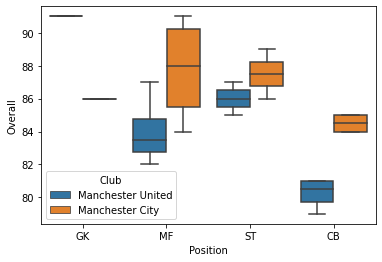

In [44]:
sns.boxplot(data = df , x='Position', y='Overall', hue = 'Club')


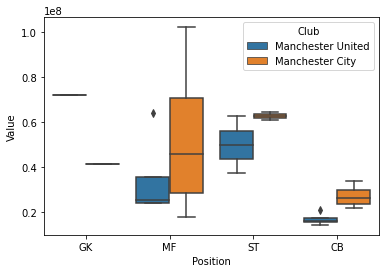

In [45]:
sns.boxplot(data=df,x='Position',y='Value', hue='Club')

MU선수와 MC선수를 비교해보면 가치에 맞는 Overall을 보여주는 형태이지만 맨유는 미드필드와 수비의 교체가 필요해보인다.

# 4. Manchester United는 어떤 선수를 영입해야 할까?

## a. EDA

- 필요 포지션의 어떤 선수를 대체해야할지 확인
- 기준은 영입일, 능력치, 잠재력, 나이

### 나이가 어릴 수록 잘할 가능성이 높고, 잠재력과 Overall이 높을 수록 잔류 점수를 높게 준다 현재 실력을 잠재력보다 더 높은 가중치를 준다.

- 잔류포인트 = (Overall * 2 + Potential) / Age 

In [46]:
mu['Point'] = (mu['Overall']*2 + mu['Potential']) / mu['Age']

In [47]:
mu[mu['Position'] == 'MF'][['Name','Age','Overall','Potential','Point']]

,Name,Age,Overall,Potential,Point
4,P. Pogba,25,87.0,91.0,10.600000
17,N. Matić,29,84.0,84.0,8.689655
22,Juan Mata,30,83.0,83.0,8.300000
23,Fred,25,82.0,84.0,9.920000


In [48]:
mu[mu['Position'] == 'CB'][['Name','Age','Overall','Potential','Point']]

,Name,Age,Overall,Potential,Point
26,E. Bailly,24,81.0,87.0,10.375000
29,C. Smalling,28,81.0,82.0,8.714286
31,L. Shaw,22,80.0,85.0,11.136364
34,V. Lindelöf,23,79.0,85.0,10.565217


#### 잔류포인트가 가장 낮은 Juan Mata, C. Smalling 방출 후 MF, CB한명씩 영입

## b. 시각화

지금까지의 EDA를 바탕으로 데려올 선수들의 능력치를 시각화합시다.

- Manchester United의 영입방칙은 최근 새로 부임한 솔샤르감독의 영입방침을 따릅니다.
- 선수의 나이는 어릴수록 좋음
- 잠재력 보다 현재 바로 주전으로 사용할 수 있는 선수
- 포지션은 마타와 스몰링의 상세포지션인 RM, CB를 따른다.


In [49]:
# RM, CB 포지션을 제외한 선수들을 제거
market = data[(data['Position']=='RM') | (data['Position']=='CB')]

market

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
12,182493,D. Godín,32,Uruguay,90.0,90.0,Atlético Madrid,€44M,€125K,Right,3.0,3.0,2.0,CB,10.0,"Aug 4, 2010",2019,6'2,172lbs,64+3,64+3,64+3,61+3,62+3,62+3,62+3,61+3,62+3,62+3,62+3,63+3,68+3,68+3,68+3,63+3,76+3,81+3,81+3,81+3,76+3,79+3,87+3,87+3,87+3,79+3,55.0,42.0,92.0,79.0,47.0,53.0,49.0,51.0,70.0,76.0,68.0,68.0,58.0,85.0,54.0,67.0,91.0,66.0,88.0,43.0,89.0,88.0,48.0,52.0,50.0,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,€90.2M
25,231747,K. Mbappé,19,France,88.0,95.0,Paris Saint-Germain,€81M,€100K,Right,3.0,4.0,5.0,RM,10.0,"Jul 1, 2018",2022,5'10,161lbs,85+3,85+3,85+3,87+3,87+3,87+3,87+3,87+3,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,66+3,62+3,62+3,62+3,66+3,62+3,54+3,54+3,54+3,62+3,77.0,88.0,77.0,82.0,78.0,90.0,77.0,63.0,73.0,91.0,96.0,96.0,92.0,87.0,83.0,79.0,75.0,83.0,71.0,78.0,62.0,38.0,88.0,82.0,70.0,86.0,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,€166.1M
26,209331,M. Salah,26,Egypt,88.0,89.0,Liverpool,€69.5M,€255K,Left,3.0,3.0,4.0,RM,10.0,"Jul 1, 2017",2023,5'9,157lbs,83+3,83+3,83+3,87+3,86+3,86+3,86+3,87+3,86+3,86+3,86+3,86+3,80+3,80+3,80+3,86+3,70+3,66+3,66+3,66+3,70+3,66+3,57+3,57+3,57+3,66+3,78.0,90.0,59.0,82.0,73.0,89.0,83.0,60.0,72.0,88.0,94.0,91.0,91.0,91.0,88.0,77.0,68.0,84.0,70.0,83.0,63.0,55.0,90.0,82.0,61.0,91.0,38.0,43.0,41.0,14.0,14.0,9.0,11.0,14.0,€137.3M
42,205600,S. Umtiti,24,France,87.0,92.0,FC Barcelona,€57M,€205K,Left,3.0,3.0,2.0,CB,23.0,"Jul 12, 2016",2023,6'0,165lbs,70+3,70+3,70+3,69+3,69+3,69+3,69+3,69+3,69+3,69+3,69+3,70+3,73+3,73+3,73+3,70+3,80+3,81+3,81+3,81+3,80+3,81+3,84+3,84+3,84+3,81+3,69.0,51.0,79.0,81.0,70.0,69.0,72.0,62.0,73.0,77.0,71.0,73.0,68.0,82.0,66.0,83.0,89.0,78.0,84.0,74.0,81.0,87.0,58.0,58.0,61.0,82.0,90.0,89.0,86.0,15.0,10.0,14.0,12.0,15.0,€121.1M
73,177509,M. Benatia,31,Morocco,86.0,86.0,Juventus,€30M,€160K,Right,3.0,3.0,2.0,CB,4.0,"Aug 26, 2014",2020,6'2,207lbs,61+3,61+3,61+3,57+3,58+3,58+3,58+3,57+3,57+3,57+3,57+3,60+3,62+3,62+3,62+3,60+3,73+3,76+3,76+3,76+3,73+3,75+3,84+3,84+3,84+3,75+3,45.0,47.0,83.0,65.0,44.0,64.0,34.0,27.0,65.0,64.0,65.0,75.0,59.0,82.0,53.0,66.0,85.0,69.0,91.0,24.0,86.0,86.0,38.0,47.0,41.0,82.0,89.0,87.0,85.0,7.0,4.0,8.0,7.0,11.0,€49.5M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18133,246142,M. Finne Wørts,19,Denmark,49.0,61.0,FC Nordsjælland,€50K,€1K,Right,1.0,3.0,2.0,CB,23.0,"Oct 10, 2018",2019,6'0,165lbs,36+2,36+2,36+2,36+2,35+2,35+2,35+2,36+2,37+2,37+2,37+2,38+2,39+2,39+2,39+2,38+2,45+2,46+2,46+2,46+2,45+2,47+2,48+2,48+2,48+2,47+2,26.0,24.0,43.0,43.0,26.0,26.0,27.0,26.0,42.0,41.0,65.0,61.0,49.0,43.0,62.0,32.0,57.0,55.0,56.0,25.0,47.0,51.0,23.0,38.0,31.0,41.0,45.0,49.0,48.0,10.0,10.0,12.0,6.0,7.0,€73K
18165,245412,H. Norris,17,England,48.0,66.0,Oldham Athletic,€50K,€1K,Right,1.0,3.0,2.0,CB,45.0,"Jul 1, 2018",2019,5'10,141lbs,32+2,32+2,32+2,29+2,29+2,29+2,29+2,29+2,29+2,29+2,29+2,31+2,32+2,32+2,32+2,31+2,41+2,41+2,41+2,41+2,41+2,43+2,46+2,46+2,46+2,43+2,19.0,17.0,40.0,33.0,28.0,20.0,21.0,25.0,27.0,30.0,60.0,51.0,49.0,39.0,49.0,38.0,66.0,60.0,63.0,21.0,42.0,49.0,22.0,26.0,30.0,33.0,48.0,48.0,46.0,9.0,11.0,11.0,7.0,11.0,€119K
18168,245417,J. Manley,19,Repu

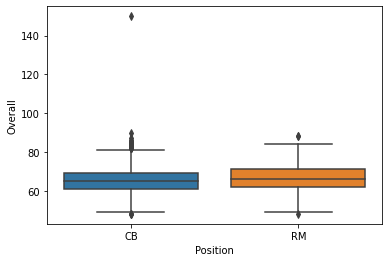

In [50]:
sns.boxplot(data = market, x='Position', y='Overall')

Market 데이터에도 Overall 이 100이상인 이상치가 있는 것을 확인할 수 있다.

2902명의 선수들이 있으므로 이상치의 선수 데이터는 제거하고 진행

In [51]:
market[market['Overall']>100].index

Int64Index([11422], dtype='int64')

In [52]:
market = market.drop(11422)

## 분류된 선수를 새로운 기준으로 순위를 매김

*   (Overall * 2 + Potential) -  Age




In [53]:
market['Point'] = (market['Overall'] * 2 + market['Potential']) - market['Age']

market.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,...,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Point
12,182493,D. Godín,32,Uruguay,90.0,90.0,Atlético Madrid,€44M,€125K,Right,3.0,3.0,2.0,CB,10.0,"Aug 4, 2010",2019,6'2,172lbs,64+3,64+3,64+3,61+3,62+3,62+3,62+3,61+3,62+3,62+3,62+3,63+3,68+3,68+3,68+3,63+3,76+3,81+3,81+3,81+3,76+3,...,87+3,87+3,87+3,79+3,55.0,42.0,92.0,79.0,47.0,53.0,49.0,51.0,70.0,76.0,68.0,68.0,58.0,85.0,54.0,67.0,91.0,66.0,88.0,43.0,89.0,88.0,48.0,52.0,50.0,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,€90.2M,238.0
25,231747,K. Mbappé,19,France,88.0,95.0,Paris Saint-Germain,€81M,€100K,Right,3.0,4.0,5.0,RM,10.0,"Jul 1, 2018",2022,5'10,161lbs,85+3,85+3,85+3,87+3,87+3,87+3,87+3,87+3,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,66+3,62+3,62+3,62+3,66+3,...,54+3,54+3,54+3,62+3,77.0,88.0,77.0,82.0,78.0,90.0,77.0,63.0,73.0,91.0,96.0,96.0,92.0,87.0,83.0,79.0,75.0,83.0,71.0,78.0,62.0,38.0,88.0,82.0,70.0,86.0,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,€166.1M,252.0
26,209331,M. Salah,26,Egypt,88.0,89.0,Liverpool,€69.5M,€255K,Left,3.0,3.0,4.0,RM,10.0,"Jul 1, 2017",2023,5'9,157lbs,83+3,83+3,83+3,87+3,86+3,86+3,86+3,87+3,86+3,86+3,86+3,86+3,80+3,80+3,80+3,86+3,70+3,66+3,66+3,66+3,70+3,...,57+3,57+3,57+3,66+3,78.0,90.0,59.0,82.0,73.0,89.0,83.0,60.0,72.0,88.0,94.0,91.0,91.0,91.0,88.0,77.0,68.0,84.0,70.0,83.0,63.0,55.0,90.0,82.0,61.0,91.0,38.0,43.0,41.0,14.0,14.0,9.0,11.0,14.0,€137.3M,239.0
42,205600,S. Umtiti,24,France,87.0,92.0,FC Barcelona,€57M,€205K,Left,3.0,3.0,2.0,CB,23.0,"Jul 12, 2016",2023,6'0,165lbs,70+3,70+3,70+3,69+3,69+3,69+3,69+3,69+3,69+3,69+3,69+3,70+3,73+3,73+3,73+3,70+3,80+3,81+3,81+3,81+3,80+3,...,84+3,84+3,84+3,81+3,69.0,51.0,79.0,81.0,70.0,69.0,72.0,62.0,73.0,77.0,71.0,73.0,68.0,82.0,66.0,83.0,89.0,78.0,84.0,74.0,81.0,87.0,58.0,58.0,61.0,82.0,90.0,89.0,86.0,15.0,10.0,14.0,12.0,15.0,€121.1M,242.0
73,177509,M. Benatia,31,Morocco,86.0,86.0,Juventus,€30M,€160K,Right,3.0,3.0,2.0,CB,4.0,"Aug 26, 2014",2020,6'2,207lbs,61+3,61+3,61+3,57+3,58+3,58+3,58+3,57+3,57+3,57+3,57+3,60+3,62+3,62+3,62+3,60+3,73+3,76+3,76+3,76+3,73+3,...,84+3,84+3,84+3,75+3,45.0,47.0,83.0,65.0,44.0,64.0,34.0,27.0,65.0,64.0,65.0,75.0,59.0,82.0,53.0,66.0,85.0,69.0,91.0,24.0,86.0,86.0,38.0,47.0,41.0,82.0,89.0,87.0,85.0,7.0,4.0,8.0,7.0,11.0,€49.5M,227.0


In [54]:
market_cb = market[market['Position'] == 'CB']
market_rm = market[market['Position'] == 'RM']  

In [55]:
market_cb = market_cb.sort_values(by='Point', ascending=False)
market_rm = market_rm.sort_values(by='Point', ascending=False)

In [56]:
market_cb.head()


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,...,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Point
25,231747,K. Mbappé,19,France,88.0,95.0,Paris Saint-Germain,€81M,€100K,Right,3.0,4.0,5.0,RM,10.0,"Jul 1, 2018",2022,5'10,161lbs,85+3,85+3,85+3,87+3,87+3,87+3,87+3,87+3,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,66+3,62+3,62+3,62+3,66+3,...,54+3,54+3,54+3,62+3,77.0,88.0,77.0,82.0,78.0,90.0,77.0,63.0,73.0,91.0,96.0,96.0,92.0,87.0,83.0,79.0,75.0,83.0,71.0,78.0,62.0,38.0,88.0,82.0,70.0,86.0,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,€166.1M,252.0
26,209331,M. Salah,26,Egypt,88.0,89.0,Liverpool,€69.5M,€255K,Left,3.0,3.0,4.0,RM,10.0,"Jul 1, 2017",2023,5'9,157lbs,83+3,83+3,83+3,87+3,86+3,86+3,86+3,87+3,86+3,86+3,86+3,86+3,80+3,80+3,80+3,86+3,70+3,66+3,66+3,66+3,70+3,...,57+3,57+3,57+3,66+3,78.0,90.0,59.0,82.0,73.0,89.0,83.0,60.0,72.0,88.0,94.0,91.0,91.0,91.0,88.0,77.0,68.0,84.0,70.0,83.0,63.0,55.0,90.0,82.0,61.0,91.0,38.0,43.0,41.0,14.0,14.0,9.0,11.0,14.0,€137.3M,239.0
122,204970,F. Thauvin,25,France,84.0,87.0,Olympique de Marseille,€39M,€72K,Left,2.0,3.0,4.0,RM,20.0,"Jul 1, 2017",2021,5'10,154lbs,81+2,81+2,81+2,83+2,83+2,83+2,83+2,83+2,82+2,82+2,82+2,83+2,77+2,77+2,77+2,83+2,65+2,62+2,62+2,62+2,65+2,...,53+2,53+2,53+2,61+2,83.0,81.0,75.0,83.0,74.0,85.0,86.0,72.0,76.0,86.0,87.0,80.0,86.0,83.0,71.0,83.0,76.0,83.0,66.0,82.0,56.0,42.0,83.0,80.0,74.0,82.0,46.0,29.0,31.0,8.0,11.0,14.0,10.0,9.0,€77M,230.0
233,227055,Gelson Martins,23,Portugal,82.0,87.0,Atlético Madrid,€29.5M,€59K,Right,3.0,3.0,5.0,RM,18.0,"Jul 25, 2018",2023,5'8,159lbs,74+3,74+3,74+3,81+3,79+3,79+3,79+3,81+3,79+3,79+3,79+3,81+3,73+3,73+3,73+3,81+3,68+3,62+3,62+3,62+3,68+3,...,53+3,53+3,53+3,65+3,81.0,66.0,51.0,78.0,74.0,85.0,82.0,60.0,55.0,83.0,95.0,94.0,94.0,83.0,92.0,72.0,65.0,87.0,48.0,69.0,60.0,43.0,82.0,79.0,66.0,85.0,54.0,46.0,36.0,12.0,9.0,7.0,6.0,9.0,€62.7M,228.0
243,212404,F. Bernardeschi,24,Italy,82.0,87.0,Juventus,€29.5M,€110K,Left,2.0,3.0,5.0,RM,20.0,"Jul 24, 2017",2022,6'1,170lbs,75+2,75+2,75+2,81+2,80+2,80+2,80+2,81+2,81+2,81+2,81+2,81+2,78+2,78+2,78+2,81+2,71+2,68+2,68+2,68+2,71+2,...,59+2,59+2,59+2,68+2,82.0,70.0,50.0,82.0,74.0,86.0,82.0,80.0,72.0,87.0,83.0,83.0,85.0,80.0,79.0,82.0,49.0,80.0,63.0,82.0,52.0,66.0,78.0,80.0,72.0,83.0,65.0,46.0,42.0,14.0,15.0,10.0,13.0,12.0,€50.9M,227.0


In [58]:
market_rm.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,...,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Point
25,231747,K. Mbappé,19,France,88.0,95.0,Paris Saint-Germain,€81M,€100K,Right,3.0,4.0,5.0,RM,10.0,"Jul 1, 2018",2022,5'10,161lbs,85+3,85+3,85+3,87+3,87+3,87+3,87+3,87+3,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,66+3,62+3,62+3,62+3,66+3,...,54+3,54+3,54+3,62+3,77.0,88.0,77.0,82.0,78.0,90.0,77.0,63.0,73.0,91.0,96.0,96.0,92.0,87.0,83.0,79.0,75.0,83.0,71.0,78.0,62.0,38.0,88.0,82.0,70.0,86.0,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,€166.1M,252.0
26,209331,M. Salah,26,Egypt,88.0,89.0,Liverpool,€69.5M,€255K,Left,3.0,3.0,4.0,RM,10.0,"Jul 1, 2017",2023,5'9,157lbs,83+3,83+3,83+3,87+3,86+3,86+3,86+3,87+3,86+3,86+3,86+3,86+3,80+3,80+3,80+3,86+3,70+3,66+3,66+3,66+3,70+3,...,57+3,57+3,57+3,66+3,78.0,90.0,59.0,82.0,73.0,89.0,83.0,60.0,72.0,88.0,94.0,91.0,91.0,91.0,88.0,77.0,68.0,84.0,70.0,83.0,63.0,55.0,90.0,82.0,61.0,91.0,38.0,43.0,41.0,14.0,14.0,9.0,11.0,14.0,€137.3M,239.0
122,204970,F. Thauvin,25,France,84.0,87.0,Olympique de Marseille,€39M,€72K,Left,2.0,3.0,4.0,RM,20.0,"Jul 1, 2017",2021,5'10,154lbs,81+2,81+2,81+2,83+2,83+2,83+2,83+2,83+2,82+2,82+2,82+2,83+2,77+2,77+2,77+2,83+2,65+2,62+2,62+2,62+2,65+2,...,53+2,53+2,53+2,61+2,83.0,81.0,75.0,83.0,74.0,85.0,86.0,72.0,76.0,86.0,87.0,80.0,86.0,83.0,71.0,83.0,76.0,83.0,66.0,82.0,56.0,42.0,83.0,80.0,74.0,82.0,46.0,29.0,31.0,8.0,11.0,14.0,10.0,9.0,€77M,230.0
233,227055,Gelson Martins,23,Portugal,82.0,87.0,Atlético Madrid,€29.5M,€59K,Right,3.0,3.0,5.0,RM,18.0,"Jul 25, 2018",2023,5'8,159lbs,74+3,74+3,74+3,81+3,79+3,79+3,79+3,81+3,79+3,79+3,79+3,81+3,73+3,73+3,73+3,81+3,68+3,62+3,62+3,62+3,68+3,...,53+3,53+3,53+3,65+3,81.0,66.0,51.0,78.0,74.0,85.0,82.0,60.0,55.0,83.0,95.0,94.0,94.0,83.0,92.0,72.0,65.0,87.0,48.0,69.0,60.0,43.0,82.0,79.0,66.0,85.0,54.0,46.0,36.0,12.0,9.0,7.0,6.0,9.0,€62.7M,228.0
243,212404,F. Bernardeschi,24,Italy,82.0,87.0,Juventus,€29.5M,€110K,Left,2.0,3.0,5.0,RM,20.0,"Jul 24, 2017",2022,6'1,170lbs,75+2,75+2,75+2,81+2,80+2,80+2,80+2,81+2,81+2,81+2,81+2,81+2,78+2,78+2,78+2,81+2,71+2,68+2,68+2,68+2,71+2,...,59+2,59+2,59+2,68+2,82.0,70.0,50.0,82.0,74.0,86.0,82.0,80.0,72.0,87.0,83.0,83.0,85.0,80.0,79.0,82.0,49.0,80.0,63.0,82.0,52.0,66.0,78.0,80.0,72.0,83.0,65.0,46.0,42.0,14.0,15.0,10.0,13.0,12.0,€50.9M,227.0


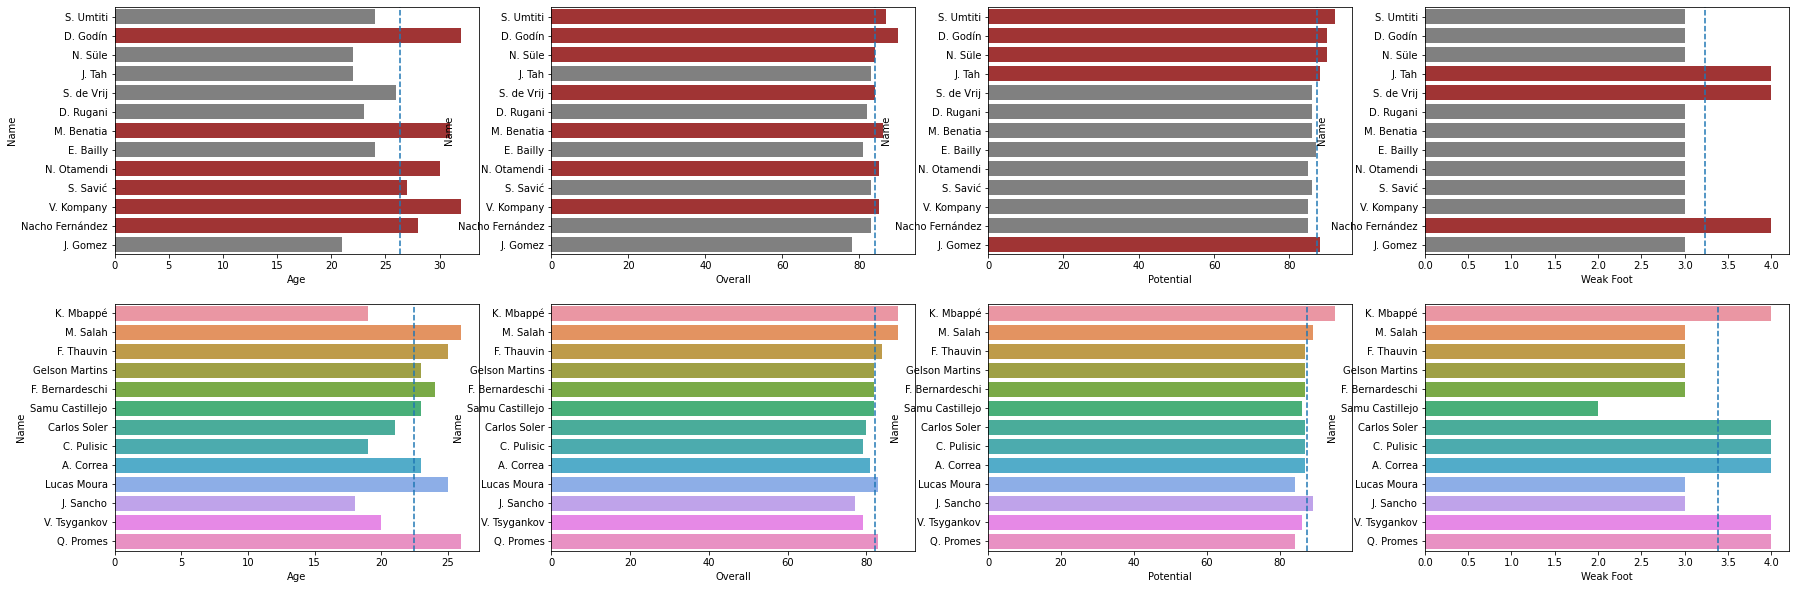

In [57]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(2,4,figsize=(30, 10))

vs_list = [ 'Age', 'Overall', 'Potential', 'Weak Foot']

for i in range(8):
  if i < 4 :
        colors = ['firebrick' if x > market_cb[:13][vs_list[i]].mean() else 'gray' for x in market_cb[:13][vs_list[i]]]
        
        sns.barplot(x= vs_list[i], y = 'Name', data = market_cb[:13], palette = colors, ax = ax[i//4, i%4])
        
        ax[i//4, i%4].axvline(market_cb[:13][vs_list[i]].mean(), ls = '--')
        
  else :
        sns.barplot(x = vs_list[i%4], y = 'Name', data = market_rm[:13], ax = ax[i//4, i%4])
        
        ax[i//4, i%4].axvline(market_rm[:13][vs_list[i%4]].mean(), ls= '--')


### 나이는 어릴 수록 좋고 Overall과 Potential은 높을 수록 좋다는 기준으로 판단

### CB은 **S.Umtiti**, RM 은 **K.Mbappe** 가 가장 적합하다고 생각할 수 있다. 하지만 이적료나 몸값과 같은 부분을 고려한다면 또 다른 결과가 나올 수도 있다. 